# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent. 
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

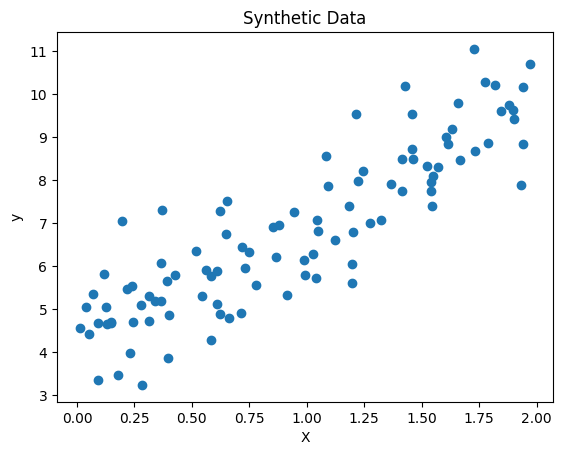

In [86]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()



## Do Train-Test Split (75%-25%)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)





## Do the Linear Regression with Scikit-Learn Library

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_percentage_error
import pandas as pd
import numpy as np

lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred


R2_1 = r2_score(y_pred,y_test)
R2_1
MAPE_1 = mean_absolute_percentage_error(y_pred,y_test)
MAPE_1
result_df = pd.DataFrame(columns=['model','MAPE','R2_score'])
result_df.loc[len(result_df)] = ['linear regression',MAPE_1,R2_1]
result_df

,model,MAPE,R2_score
0,linear regression,0.12435,0.696219


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [89]:
from sklearn.linear_model import Ridge,Lasso


r = Ridge()
r.fit(X_train,y_train)
y_pred1 = r.predict(X_test)
y_pred1

MAPE_2 = mean_absolute_percentage_error(y_pred1,y_test)
R2_2 = r2_score(y_pred1,y_test)

l  = Lasso()
l.fit(X_train,y_train)
y_pred2 = l.predict(X_test)
y_pred2

MAPE_3 = mean_absolute_percentage_error(y_pred2,y_test)
R2_3 = r2_score(y_pred2,y_test)

result_df.loc[len(result_df)] = ['Ridge regression',MAPE_2,R2_2]
result_df.loc[len(result_df)] = ['Lasso regression',MAPE_3,R2_3]
result_df

,model,MAPE,R2_score
0,linear regression,0.124350,6.962191e-01
1,Ridge regression,0.121404,6.711677e-01
2,Lasso regression,0.266272,-5.401545e+30


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:
![Gradient Derivation](derivation.jpg)




## 🧠 Custom Linear Regression Class

In [90]:

class MyLinearRegression:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.coef_ = (self.m,self.c)
        self.loss_curve = []

    def fit(self, X, y, lr = 0.01, n_iters = 1000):
        n = len(X)
        X = X.reshape(-1)
        y = y.reshape(-1)

        for _ in range(n_iters):
            y_pred = self.m*X + self.c
            error = y-y_pred

            loss = (1/n) * np.sum(error**2)
            self.loss_curve.append(loss)

            dm = (-2/n)*np.dot(X,(error))
            dc = (-2/n)*sum(error)

            self.m -= lr*dm
            self.c -= lr*dc

        self.coef_ = (self.m,self.c)


    def predict(self, X):
        X = X.reshape(-1)
        return self.m*X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


## 🔁 Train the Model and Visualize the Fit

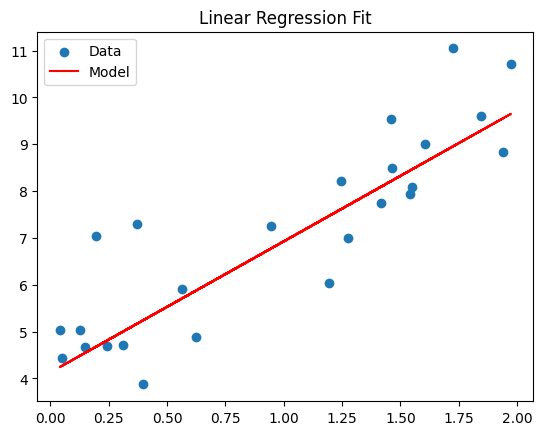

Learned coefficients (m, c): (np.float64(2.827375671122736), np.float64(4.095740935681998))


In [91]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred_cust = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_)


## 📉 Plot the Loss Curve

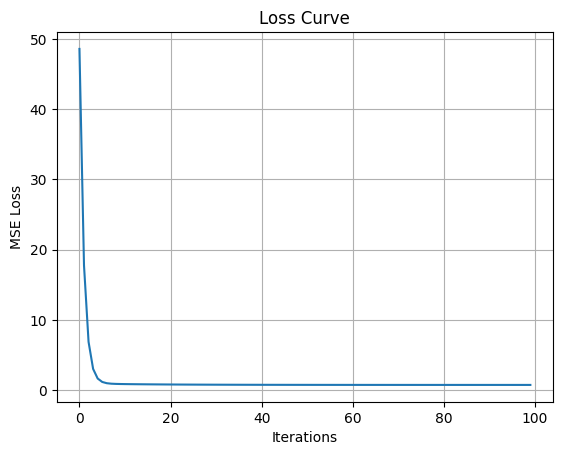

In [92]:
plt.plot(model.loss_curve)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [93]:

class MyLinearRegressionSGD:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.coef_ = (self.m,self.c)
        self.loss_curve = []

    def fit(self, X, y, lr = 0.01, n_iters = 100):
        n = len(X)
        X = X.reshape(-1)
        y = y.reshape(-1)

        for _ in range(n_iters):
            for i in range(n):
                xi = X[i]
                yi = y[i]
                y_pred = self.m*xi + self.c
                error = yi-y_pred

                dm = -2 *xi*error
                dc = -2*error

                self.m -= lr*dm
                self.c -= lr*dc
            y_pred_all  = self.m*X + self.c
            epoch_loss = (1/n) * np.sum((y-y_pred_all)**2)
            self.loss_curve.append(epoch_loss)
        self.coef_ = (self.m,self.c)


    def predict(self, X):
        X = X.reshape(-1)
        return self.m*X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


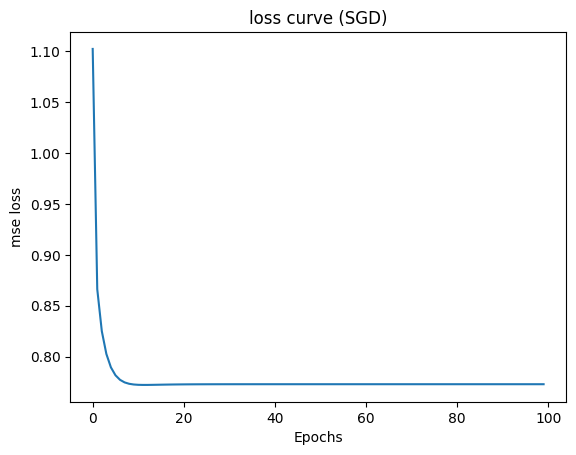

In [94]:
model_sgd = MyLinearRegressionSGD()
model_sgd.fit(X_train,y_train,lr = 0.01,n_iters=100)
pred = model_sgd.predict(X_test)
plt.plot(model_sgd.loss_curve)
plt.title("loss curve (SGD)")
plt.xlabel("Epochs")
plt.ylabel("mse loss")
plt.show()

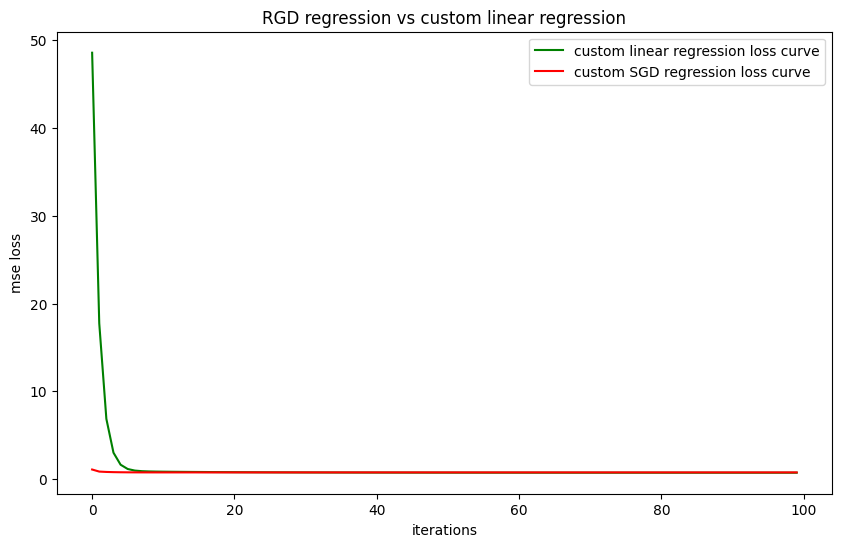

In [95]:
plt.figure(figsize=(10,6))
plt.plot(model.loss_curve,color = 'green',label = 'custom linear regression loss curve')
plt.plot(model_sgd.loss_curve,color = 'red',label = 'custom SGD regression loss curve')
plt.xlabel("iterations")
plt.ylabel("mse loss")
plt.title("RGD regression vs custom linear regression")
plt.legend()
# plt.grid(True)
plt.show()

## Visualize the prediction result of Library version and Custom regression code created

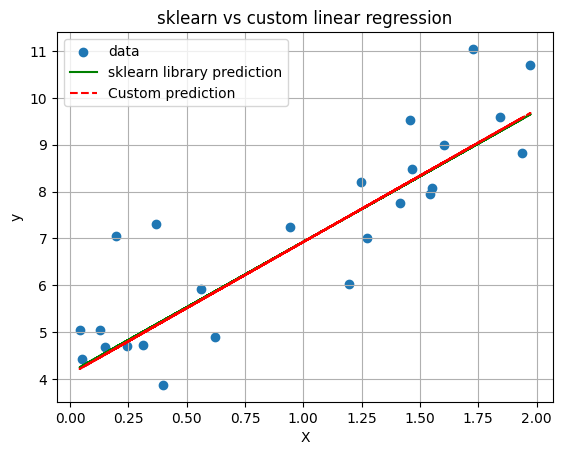

,0
8.457083,8.443218
4.455148,4.486224
8.976376,8.956679
4.239480,4.272978
8.234985,8.223613
4.514445,4.544856
5.219429,5.241922
5.854269,5.869633
6.765999,6.771124
9.578501,9.552042


In [96]:
plt.Figure(figsize=(10,6))
plt.scatter(X_test,y_test,label = "data")
plt.plot(X_test,y_pred,label = 'sklearn library prediction',color = "green")
plt.plot(X_test,y_pred_cust,color = "red",linestyle = '--',label = "Custom prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("sklearn vs custom linear regression")
plt.legend()
plt.grid(True)
plt.show()
df = pd.DataFrame(y_pred,y_pred_cust)
df

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version